# 4.12. Przegląd innych modeli regresji

Biblioteka scikit-learn dostarcza również kilka innych algorytmów służących do tworzenia modeli regresji. Nie będziemy wchodzić w ich detale implementacyjne, tylko pokrótce wspomnimy niektóre z nich, żeby dać ogólny obraz dostępnych narzędzi.


In [3]:
import pandas as pd
import numpy as np

In [4]:
np.random.seed(2020)
x = np.linspace(0, 10, 12)
xy_df = pd.DataFrame({
    "x": x,
    "y": x ** 2 - 7 * x + 2 * np.random.normal(size=12)
})
xy_df.sample(n=5)

,x,y
0,0.000000,-3.537691
3,2.727273,-12.955753
10,9.090909,17.405597
11,10.000000,32.624070
8,7.272727,2.803697


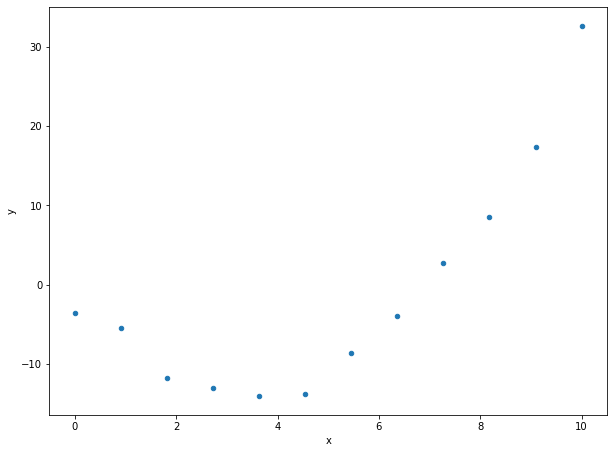

In [6]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))

In [9]:
X, y = xy_df[["x"]], xy_df["y"]

In [17]:
X_test = np.linspace(-2, 12, 1000) \
    .reshape(-1, 1)

## ElasticNet

Wspomnieliśmy już metody regularyzacji Lasso i Ridge. Nic nie stoi na przeszkodzie, aby wykorzystać je równocześnie. ElasticNet jest rozszerzeniem, które łączy obie normy, dzięki czemu nie musimy decydować, która z nich będzie lepiej pasować do naszego problemu. Dzięki wykorzystaniu regularyzacji L1, możemy także zredukować wymiarowość danych, ponieważ część wag może zostać wyzerowana.

In [18]:
from sklearn.linear_model import ElasticNet

In [19]:
en = ElasticNet()
en.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
import matplotlib.pyplot as plt

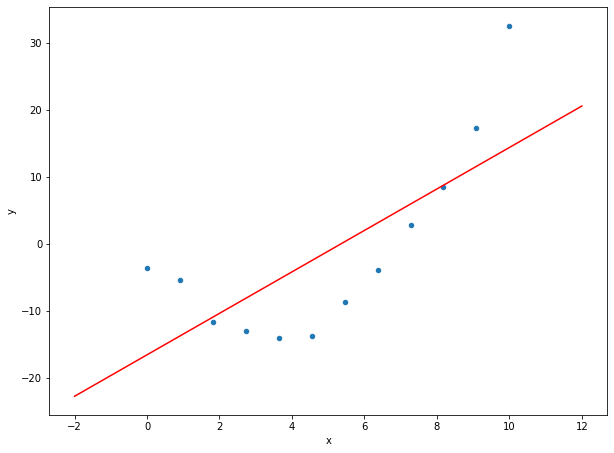

In [24]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(X_test[:, 0], en.predict(X_test), c="red")

## Decision Tree Regression

Drzewa decyzyjne oraz metody pochodne, to dość szeroka klasa algorytmów i wymagają osobnego kursu, aby je zrozumieć. Umożliwiają one również rozwiązanie problemu regresji, jednakże są podatne na przeuczenie.

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt = DecisionTreeRegressor()
dt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

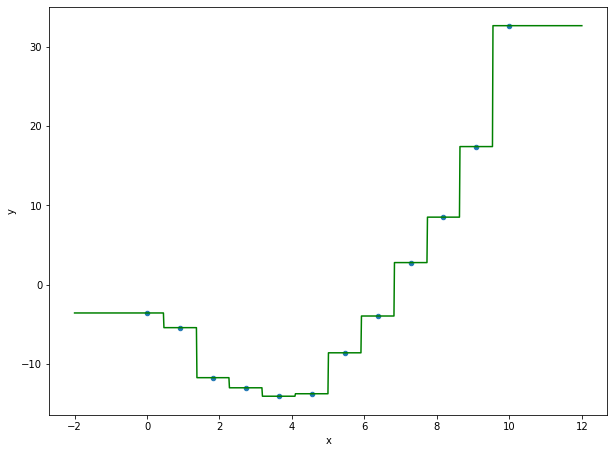

In [31]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(X_test[:, 0], dt.predict(X_test), c="green")

## Radius Neighbors Regression

Istnieją także metody, które przewidują wartość dla danego punktu na podstawie wartości najbliższych obserwacji ze zbioru treningowego. Omówimy szerzej jedną z takich metod w trakcie rozpatrywania problemu klasyfikacji, jednak tutaj wspomnimy tylko inną metodę z tej samej rodziny, która pozwala nam przeprowadzić również regresję zmiennej.

In [29]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [37]:
rnr = RadiusNeighborsRegressor(radius=2)
rnr.fit(X, y)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2, radius=2,
                         weights='uniform')

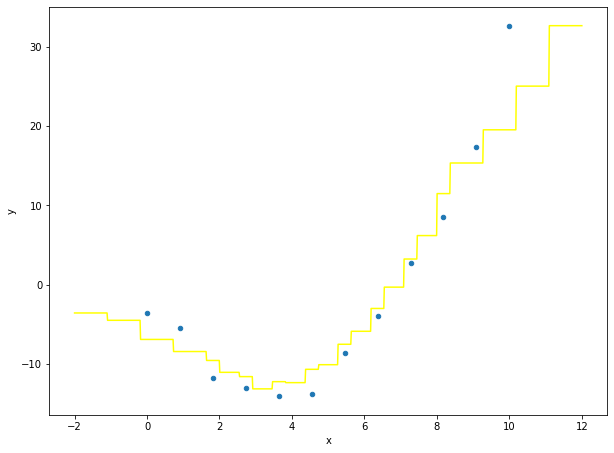

In [38]:
xy_df.plot.scatter(x="x", y="y", 
                   figsize=(10.0, 7.5))
plt.plot(X_test[:, 0], rnr.predict(X_test), c="yellow")